In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
my_time = df['pickup_datetime'][0]

In [13]:
my_time.hour

8

In [14]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [15]:
df['Hour'] = df['EDTdate'].dt.hour

In [16]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [18]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [19]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [20]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']

In [21]:
y_col = ['fare_amount']

In [22]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [23]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [24]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [25]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [26]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [27]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [28]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [29]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [30]:
cats = torch.tensor(cats, dtype=torch.int64)

In [31]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)


In [32]:
conts = torch.tensor(conts, dtype=torch.float)

In [33]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [34]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)


In [35]:
cats.shape

torch.Size([120000, 3])

In [36]:
conts.shape

torch.Size([120000, 6])

In [37]:
y.shape

torch.Size([120000, 1])

In [38]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [39]:
cat_szs

[24, 2, 7]

In [40]:
emb_szs = [(size, min(50, (size + 1) // 2)) for size in cat_szs]

In [41]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [42]:
catz = cats[:2]

In [43]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [44]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [45]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [46]:
# Forward method (cats)
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(cats[:,i]))

In [47]:
embeddingz

[tensor([[-1.5399, -0.3435, -0.3214,  ...,  0.1881,  0.8162, -0.4737],
         [-1.0593, -0.6781,  0.4699,  ...,  0.2097, -1.3307,  1.1758],
         [-0.1624, -0.8577, -0.7021,  ..., -1.3373,  0.2981,  2.2878],
         ...,
         [ 1.1693, -0.0550,  0.0923,  ...,  1.2014,  0.3328, -0.5707],
         [-1.5399, -0.3435, -0.3214,  ...,  0.1881,  0.8162, -0.4737],
         [ 0.6662, -2.6306,  2.0940,  ..., -0.5116, -0.6712,  0.6686]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-1.6278],
         [-1.6278],
         [-1.6278],
         ...,
         [ 1.2225],
         [-1.6278],
         [ 1.2225]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.3927, -0.2312,  0.8922,  0.3936],
         [-0.2434, -0.3751, -1.4269, -0.8446],
         [-0.2434, -0.3751, -1.4269, -0.8446],
         ...,
         [-0.4203,  0.8012,  1.2870, -1.8429],
         [-2.0126,  1.3589,  1.0268, -1.1261],
         [-0.2434, -0.3751, -1.4269, -0.8446]], grad_fn=<EmbeddingBackward0>)]

In [48]:
z = torch.cat(embeddingz, 1)

In [49]:
z

tensor([[-1.5399, -0.3435, -0.3214,  ..., -0.2312,  0.8922,  0.3936],
        [-1.0593, -0.6781,  0.4699,  ..., -0.3751, -1.4269, -0.8446],
        [-0.1624, -0.8577, -0.7021,  ..., -0.3751, -1.4269, -0.8446],
        ...,
        [ 1.1693, -0.0550,  0.0923,  ...,  0.8012,  1.2870, -1.8429],
        [-1.5399, -0.3435, -0.3214,  ...,  1.3589,  1.0268, -1.1261],
        [ 0.6662, -2.6306,  2.0940,  ..., -0.3751, -1.4269, -0.8446]],
       grad_fn=<CatBackward0>)

In [50]:
selfembdrop = nn.Dropout(0.4)

In [51]:
z = selfembdrop(z)

In [52]:
z

tensor([[-0.0000, -0.0000, -0.5357,  ..., -0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ..., -0.6252, -0.0000, -1.4077],
        [-0.0000, -1.4295, -0.0000,  ..., -0.6252, -2.3782, -1.4077],
        ...,
        [ 0.0000, -0.0917,  0.1538,  ...,  1.3354,  0.0000, -3.0716],
        [-0.0000, -0.0000, -0.5357,  ...,  2.2649,  1.7113, -1.8768],
        [ 0.0000, -4.3843,  0.0000,  ..., -0.6252, -2.3782, -1.4077]],
       grad_fn=<MulBackward0>)

In [53]:
class TabularModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        
        # Layers = [200, 100, 50]
        
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_embs = sum([nf for ni, nf in emb_szs])
        n_in = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
            
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        
        return x
    
    

In [54]:
torch.manual_seed(33)

model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

In [55]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [56]:
criterion = nn.MSELoss() # RMSE --> np.sqrt(MSE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [57]:
batch_size = 120000
test_size = int(batch_size * 0.2)

In [58]:
# DATA SHUFFLED ALREADY

cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size : batch_size]

con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size : batch_size]

In [59]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size: batch_size]

In [60]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    if i%10 == 1:
        print(f"Epoch: {i} Loss is {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time

print(f"Training took {duration/60} minutes")

Epoch: 1 Loss is 12.572160720825195
Epoch: 11 Loss is 11.710701942443848
Epoch: 21 Loss is 11.129521369934082
Epoch: 31 Loss is 10.725695610046387
Epoch: 41 Loss is 10.452879905700684
Epoch: 51 Loss is 10.231861114501953
Epoch: 61 Loss is 10.026509284973145
Epoch: 71 Loss is 9.842216491699219
Epoch: 81 Loss is 9.636282920837402
Epoch: 91 Loss is 9.435035705566406
Epoch: 101 Loss is 9.187904357910156
Epoch: 111 Loss is 8.9003267288208
Epoch: 121 Loss is 8.593804359436035
Epoch: 131 Loss is 8.240483283996582
Epoch: 141 Loss is 7.838525772094727
Epoch: 151 Loss is 7.402379512786865
Epoch: 161 Loss is 6.942512512207031
Epoch: 171 Loss is 6.46560001373291
Epoch: 181 Loss is 5.97059440612793
Epoch: 191 Loss is 5.480881690979004
Epoch: 201 Loss is 5.034086227416992
Epoch: 211 Loss is 4.640096664428711
Epoch: 221 Loss is 4.331749439239502
Epoch: 231 Loss is 4.077445030212402
Epoch: 241 Loss is 3.916823387145996
Epoch: 251 Loss is 3.863065719604492
Epoch: 261 Loss is 3.781250476837158
Epoch: 27

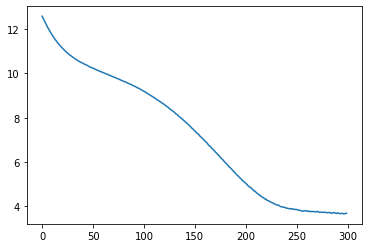

In [62]:
with torch.no_grad():
    plt.plot(range(epochs), losses)

In [63]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [64]:
loss

tensor(3.7191)

In [68]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(
        f"{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}")

0.) PREDICTED:    10.34 TRUE:     8.10 DIFF:     2.24
1.) PREDICTED:    11.58 TRUE:    12.10 DIFF:     0.52
2.) PREDICTED:     5.57 TRUE:     4.90 DIFF:     0.67
3.) PREDICTED:    19.89 TRUE:    15.30 DIFF:     4.59
4.) PREDICTED:     9.96 TRUE:    11.30 DIFF:     1.34
5.) PREDICTED:    22.19 TRUE:    16.50 DIFF:     5.69
6.) PREDICTED:     2.71 TRUE:     3.30 DIFF:     0.59
7.) PREDICTED:     3.36 TRUE:     4.50 DIFF:     1.14
8.) PREDICTED:     3.30 TRUE:     5.70 DIFF:     2.40
9.) PREDICTED:    25.07 TRUE:    20.10 DIFF:     4.97


In [70]:
torch.save(model.state_dict(), "TaxiModelRegression.pt")